#Análisis Exploratorio sobre los datos limpios y con One-Hot encoding aplicado

Angel Rafael Ortega Ramírez 	123972

Elizabeth Rodriguez 	191430

Karla Alfaro Pizaña 	137314

Leonardo Marín 	175903

Mario Rodríguez 	164471

Elizabeth Viveros

##**1) Importación y análisis inicial de las variables.**

In [1]:
#Se importan librerías esenciales
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from IPython.display import display

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Montamos nuestro Google Drive con el set de datos
from google.colab import drive
drive.mount('/content/gdrive') #Se da click en el URL que aparece y se ingresa la clave de autorización

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
os.chdir('/content/gdrive/My Drive/Proyecto_Final_MNO/data')
print("Directorio del Proyecto Final" , os.getcwd())

Directorio del Proyecto Final /content/gdrive/My Drive/Proyecto_Final_MNO/data


In [32]:
!unzip datos_limpios.csv.zip

Archive:  datos_limpios.csv.zip
replace datos_limpios.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datos_limpios.csv       
replace __MACOSX/._datos_limpios.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._datos_limpios.csv  


In [6]:
#Se obtiene una vista inicial se los datos
datos_limpios = pd.read_csv('datos_limpios.csv')
datos_limpios.head(10)

,nofolio,genero,ent,nom_ent,cct,modalidad,sost,subsist,hlec,nvl_esp,hmat,nvl_mat,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,...,p9_A,p9_B,p9_C,p9_D,p9_E,p9_F,p9_G,p67_A,p67_B,p67_C,p67_D,p67_E,p70_A,p70_B,p70_C,p70_D,p70_E,p70_F,p70_G,p70_H,p74_A,p74_B,p74_C,p74_D,p74_E,p74_F,p138_A,p138_B,p138_C,p138_D,p138_E,p138_F,p138_G,p139_A,p139_B,p139_C,p139_D,p139_E,p139_F,p139_G
0,010000023B16,M,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,-0.76369,I,-1.10088,I,0.0,5.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,3.0,3.0,2.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,3.0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,010000037B16,H,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.97389,III,-0.37852,II,1.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,4.0,3.0,3.0,5.0,6.0,3.0,5.0,3.0,3.0,2.0,2.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,010000008B16,M,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.26655,II,0.27625,II,0.0,3.0,1.0,2.0,2.0,1.0,3.0,10.0,3.0,4.0,1.0,2.0,5.0,5.0,2.0,4.0,3.0,5.0,2.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,010000035B16,H,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.36393,II,-0.37852,II,1.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,010000032B16,H,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.97389,III,0.27625,II,1.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5,010000026B16,M,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.07197,I,-0.72212,I,0.0,4.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,3.0,2.0,2.0,4.0,5.0,2.0,3.0,3.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6,010000002B16,M,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.56069,II,-0.13198,II,0.0,4.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,3.0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
7,010000003B16,M,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.97389,III,-0.05065,II,0.0,3.0,1.0,2.0,2.0,1.0,3.0,10.0,4.0,4.0,1.0,2.0,4.0,6.0,2.0,4.0,2.0,5.0,1.0,1.0,4.0,5.0,4.0,4.0,3.0,3.0,2.0,4.0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8,010000011B16,M,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,-0.43131,I,-0.05065,II,0.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
9,010000019B16,M,1,aguascalientes,01DBH0004I,bachillerato_general,federal,colbach/otros_federales,0.66085,II,-1.10088,I,0.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,4.0,2.0,2.0,4.0,5.0,2.0,2.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,...,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [7]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560626 entries, 0 to 560625
Columns: 264 entries, nofolio to p139_G
dtypes: float64(157), int64(98), object(9)
memory usage: 1.1+ GB


In [10]:
#Vista de los valores únicos del set de cuestionarios, al ser 154 preguntas no dejaremos esta visualizacion dentro del Github

for col in list(datos_limpios):
    print(col)
    print(datos_limpios[col].unique())

nofolio
['010000023B16' '010000037B16' '010000008B16' ... '320009401B16'
 '320009397B16' '320009413B16']
genero
['M' 'H']
ent
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
nom_ent
['aguascalientes' 'baja_california' 'baja_california_sur' 'campeche'
 'coahuila' 'colima' 'chiapas' 'chihuahua' 'distrito_federal' 'durango'
 'guanajuato' 'guerrero' 'hidalgo' 'jalisco' 'estado_de_mexico'
 'michoacan' 'morelos' 'nayarit' 'nuevo_leon' 'oaxaca' 'puebla'
 'queretaro' 'quintana_roo' 'san_luis_potosi' 'sinaloa' 'sonora' 'tabasco'
 'tamaulipas' 'tlaxcala' 'veracruz' 'yucatan' 'zacatecas']
cct
['01DBH0004I' '01DBH0005H' '01DBP0001U' ... '32UBH0011B' '32UBH0012A'
 '32UBH0013Z']
modalidad
['bachillerato_general' 'bachillerato_tecnologico' 'tecnico_profesional']
sost
['federal' 'estatal' 'particulares' 'autonomas']
subsist
['colbach/otros_federales' 'dgeti' 'conalep' 'bach_estatal_dge-cge'
 'telebach/emsad' 'cecyte' 'particulares/a.c.' 'bachillerato_

<Figure size 432x288 with 0 Axes>

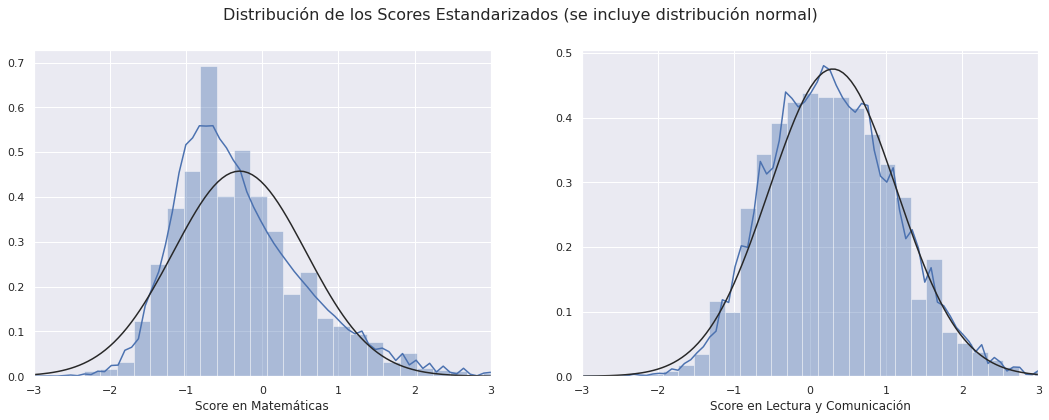

In [14]:
from scipy.stats import norm
sns.set(style="darkgrid")
fig=plt.figure()
fig,axes=plt.subplots(1,2, figsize=(18,6), sharex=True)
sns.distplot(datos_limpios.hmat, ax=axes[0], fit=norm, axlabel="Score en Matemáticas")
sns.distplot(datos_limpios.hlec, ax=axes[1], fit=norm, axlabel="Score en Lectura y Comunicación")
plt.xlim(-3, 3)
fig.suptitle('Distribución de los Scores Estandarizados (se incluye distribución normal)', fontsize=16)
fig.show()

##**2) Análisis Categorical to Quantitative relationship**

En línea con el ejercicio anterior se aplica un análisis rápido para análizar el hmat (la variable a analizar en el proyecto) por preguntas selectas dentro del set de datos limpios.
Se muestran scores más altos en alumnos **en escuelas privadas** sin embargo la sitruación laboral no parece influir mucho en el score.
La situación parental, o bien contar con un adulto que apoye al alumno influye de forma positiva

In [12]:
# Compute the correlation matrix
corr = datos_limpios.corr()
print(corr)

             ent      hlec      hmat  ...    p139_E    p139_F    p139_G
ent     1.000000  0.039003  0.044212  ... -0.012742 -0.002906 -0.006933
hlec    0.039003  1.000000  0.605180  ...  0.041585  0.154959  0.086266
hmat    0.044212  0.605180  1.000000  ...  0.019675  0.122237  0.073839
p1     -0.000864 -0.055567  0.087840  ...  0.001349 -0.004782  0.007587
p2     -0.006468 -0.096725 -0.091590  ... -0.028567 -0.047220 -0.023967
...          ...       ...       ...  ...       ...       ...       ...
p139_C -0.014622 -0.042077 -0.037111  ... -0.181554 -0.218944 -0.134606
p139_D -0.006017  0.008978 -0.000828  ... -0.121183 -0.146140 -0.089846
p139_E -0.012742  0.041585  0.019675  ...  1.000000 -0.095320 -0.058602
p139_F -0.002906  0.154959  0.122237  ... -0.095320  1.000000 -0.070671
p139_G -0.006933  0.086266  0.073839  ... -0.058602 -0.070671  1.000000

[255 rows x 255 columns]


Text(0.5, 0.98, 'Distribución de los Scores Estandarizados por Género')

<Figure size 432x288 with 0 Axes>

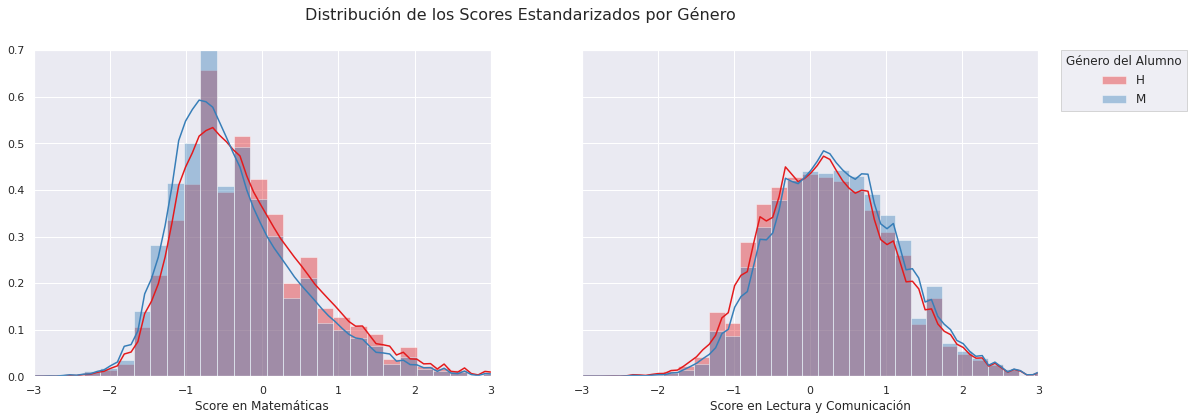

In [95]:
sns.set(style="darkgrid", palette="Set1")
fig=plt.figure()
fig,axes=plt.subplots(1,2, figsize=(18,6), sharex=True, sharey=True)


generos=['H','M']

for genero in generos:
    subset = datos_limpios[datos_limpios['genero'] == genero]
    
    sns.distplot(subset['hmat'], label = genero, ax=axes[0], axlabel="Score en Matemáticas")
    sns.distplot(subset['hlec'], label = genero, ax=axes[1], axlabel="Score en Lectura y Comunicación")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='medium', fancybox=False, title="Género del Alumno", )
plt.ylim(0, 0.7)
plt.xlim(-3, 3)
fig.suptitle('Distribución de los Scores Estandarizados por Género', fontsize=16)

Text(0.5, 0.98, 'Distribución de los Scores Estandarizados por Situación Laboral')

<Figure size 432x288 with 0 Axes>

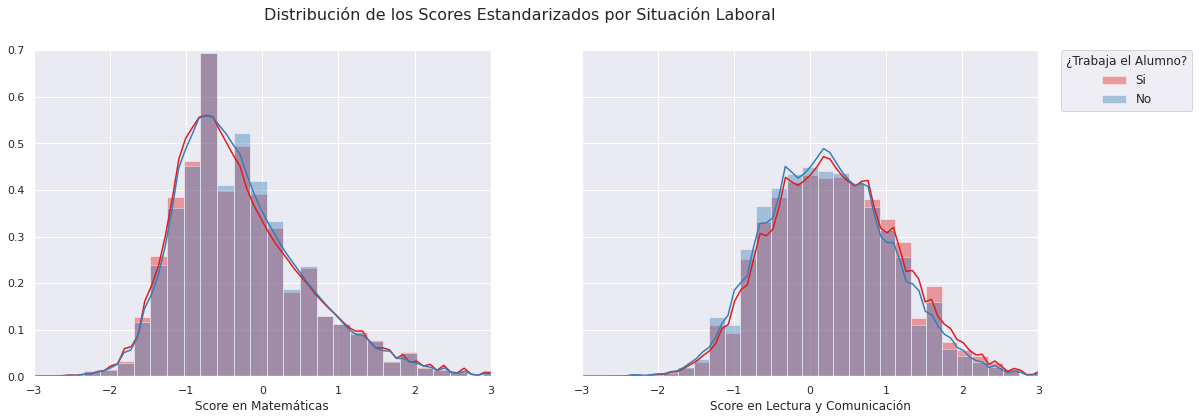

In [96]:
#Cambiamos el valor para graficar
datos_limpios['p6_str'] = datos_limpios['p6']
datos_limpios['p6_str'].replace([0,1],['Si','No'],inplace=True)

sns.set(style="darkgrid", palette="Set1")
fig=plt.figure()
fig,axes=plt.subplots(1,2, figsize=(18,6), sharex=True, sharey=True)


p6s=['Si','No']

for p6 in p6s:
    subset = datos_limpios[datos_limpios['p6_str'] == p6]
    
    sns.distplot(subset['hmat'], label = p6, ax=axes[0], axlabel="Score en Matemáticas")
    sns.distplot(subset['hlec'], label = p6, ax=axes[1], axlabel="Score en Lectura y Comunicación")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='medium', fancybox=True, title="¿Trabaja el Alumno?", )
plt.ylim(0, 0.7)
plt.xlim(-3, 3)
fig.suptitle('Distribución de los Scores Estandarizados por Situación Laboral', fontsize=16)

<Figure size 432x288 with 0 Axes>

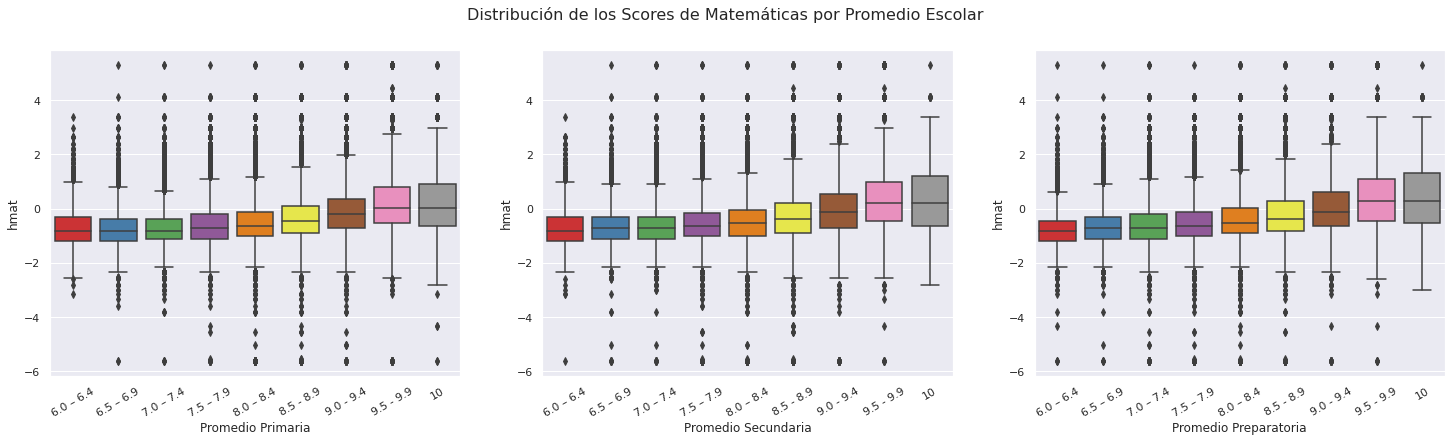

In [101]:
#Cambiamos el valor para graficar, primaria
datos_limpios['p68_str'] = datos_limpios['p68']
datos_limpios['p68_str'].replace([1,2,3,4,5,6,7,8,9],["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"],inplace=True)
#Cambiamos el valor para graficar, secundaria
datos_limpios['p71_str'] = datos_limpios['p71']
datos_limpios['p71_str'].replace([1,2,3,4,5,6,7,8,9],["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"],inplace=True)
#Cambiamos el valor para graficar, preparatoria
datos_limpios['p78_str'] = datos_limpios['p78']
datos_limpios['p78_str'].replace([1,2,3,4,5,6,7,8,9],["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"],inplace=True)

sns.set(style="darkgrid")
fig=plt.figure()
fig,axes=plt.subplots(1,3, figsize=(25,6), sharex=True)
chart1=sns.boxplot(datos_limpios.p68_str, datos_limpios.hmat, ax=axes[0], palette='Set1',order=["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"] )
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=30)
chart1.set_xlabel('Promedio Primaria')
chart2=sns.boxplot(datos_limpios.p71_str, datos_limpios.hmat, ax=axes[1], palette='Set1',order=["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"] )
chart2.set_xticklabels(chart1.get_xticklabels(),rotation=30)
chart2.set_xlabel('Promedio Secundaria')
chart3=sns.boxplot(datos_limpios.p78_str, datos_limpios.hmat, ax=axes[2], palette='Set1',order=["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"] )
chart3.set_xticklabels(chart1.get_xticklabels(),rotation=30)
chart3.set_xlabel('Promedio Preparatoria')
fig.suptitle('Distribución de los Scores de Matemáticas por Promedio Escolar', fontsize=16)
fig.show()

<Figure size 432x288 with 0 Axes>

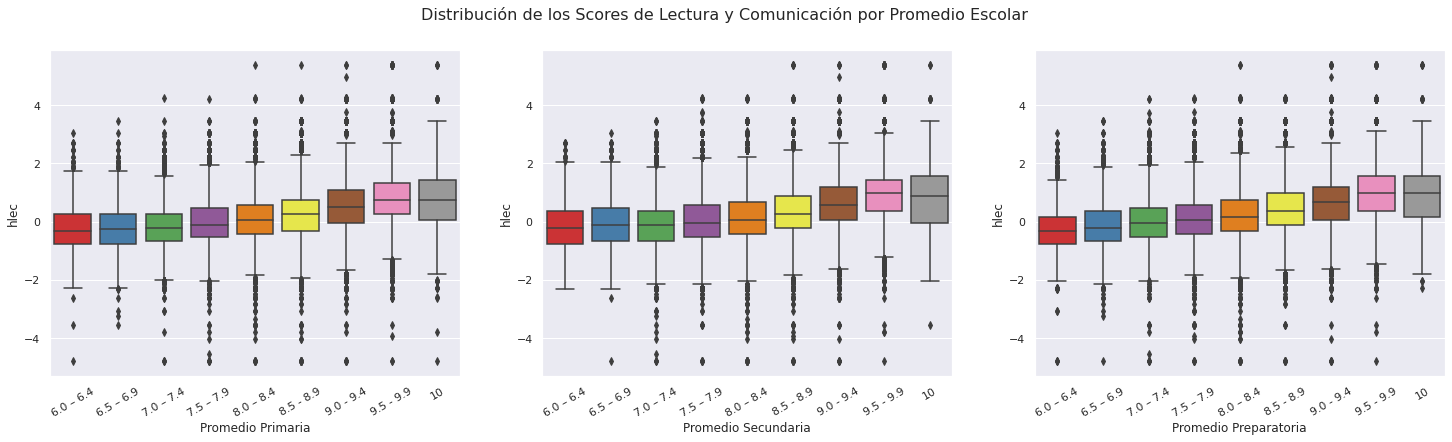

In [102]:
sns.set(style="darkgrid")
fig=plt.figure()
fig,axes=plt.subplots(1,3, figsize=(25,6), sharex=True)
chart1=sns.boxplot(datos_limpios.p68_str, datos_limpios.hlec, ax=axes[0], palette='Set1',order=["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"] )
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=30)
chart1.set_xlabel('Promedio Primaria')
chart2=sns.boxplot(datos_limpios.p71_str, datos_limpios.hlec, ax=axes[1], palette='Set1',order=["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"] )
chart2.set_xticklabels(chart1.get_xticklabels(),rotation=30)
chart2.set_xlabel('Promedio Secundaria')
chart3=sns.boxplot(datos_limpios.p78_str, datos_limpios.hlec, ax=axes[2], palette='Set1',order=["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"] )
chart3.set_xticklabels(chart1.get_xticklabels(),rotation=30)
chart3.set_xlabel('Promedio Preparatoria')
fig.suptitle('Distribución de los Scores de Lectura y Comunicación por Promedio Escolar', fontsize=16)
fig.show()

<Figure size 432x288 with 0 Axes>

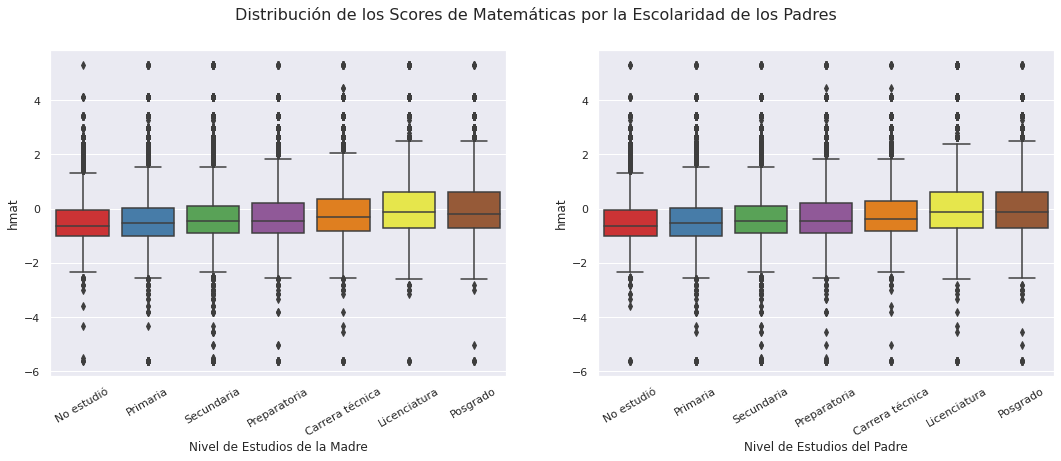

In [104]:
#Cambiamos el valor para graficar, nivel estudios de la madre
datos_limpios['p138_str'] = datos_limpios['p138']
datos_limpios['p138_str'].replace([1,2,3,4,5,6,7],["No estudió",	"Primaria",	"Secundaria",	"Preparatoria",	"Carrera técnica"	,"Licenciatura"	,"Posgrado"],inplace=True)
#Cambiamos el valor para graficar, nivel estudios del padre
datos_limpios['p139_str'] = datos_limpios['p139']
datos_limpios['p139_str'].replace([1,2,3,4,5,6,7],["No estudió",	"Primaria",	"Secundaria",	"Preparatoria",	"Carrera técnica"	,"Licenciatura"	,"Posgrado"],inplace=True)

sns.set(style="darkgrid")
fig=plt.figure()
fig,axes=plt.subplots(1,2, figsize=(18,6), sharex=True)
chart1=sns.boxplot(datos_limpios.p138_str, datos_limpios.hmat, ax=axes[0], palette='Set1',order=["No estudió",	"Primaria",	"Secundaria",	"Preparatoria",	"Carrera técnica"	,"Licenciatura"	,"Posgrado"] )
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=30)
chart1.set_xlabel('Nivel de Estudios de la Madre')
chart2=sns.boxplot(datos_limpios.p139_str, datos_limpios.hmat, ax=axes[1], palette='Set1',order=["No estudió",	"Primaria",	"Secundaria",	"Preparatoria",	"Carrera técnica"	,"Licenciatura"	,"Posgrado"] )
chart2.set_xticklabels(chart1.get_xticklabels(),rotation=30)
chart2.set_xlabel('Nivel de Estudios del Padre')
fig.suptitle('Distribución de los Scores de Matemáticas por la Escolaridad de los Padres', fontsize=16)
fig.show()

<Figure size 432x288 with 0 Axes>

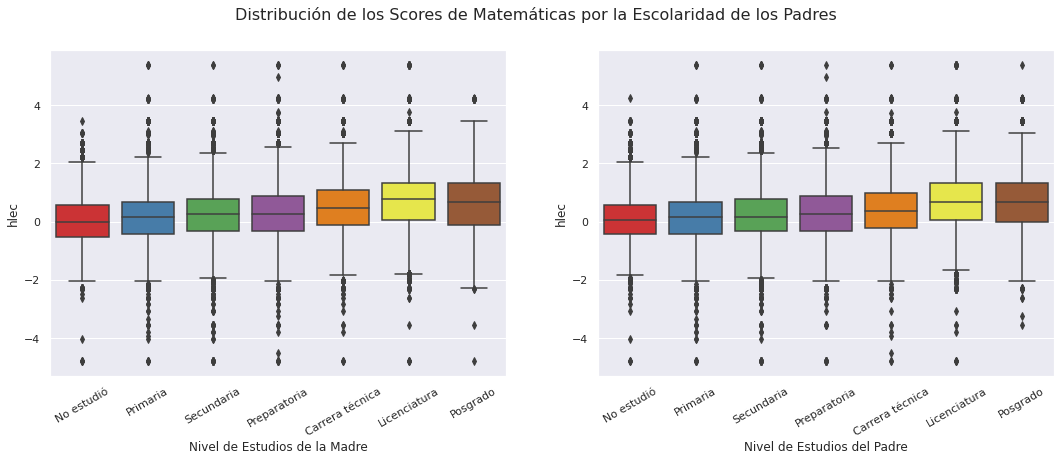

In [105]:
#Cambiamos el valor para graficar, nivel estudios de la madre
datos_limpios['p138_str'] = datos_limpios['p138']
datos_limpios['p138_str'].replace([1,2,3,4,5,6,7],["No estudió",	"Primaria",	"Secundaria",	"Preparatoria",	"Carrera técnica"	,"Licenciatura"	,"Posgrado"],inplace=True)
#Cambiamos el valor para graficar, nivel estudios del padre
datos_limpios['p139_str'] = datos_limpios['p139']
datos_limpios['p139_str'].replace([1,2,3,4,5,6,7],["No estudió",	"Primaria",	"Secundaria",	"Preparatoria",	"Carrera técnica"	,"Licenciatura"	,"Posgrado"],inplace=True)

sns.set(style="darkgrid")
fig=plt.figure()
fig,axes=plt.subplots(1,2, figsize=(18,6), sharex=True)
chart1=sns.boxplot(datos_limpios.p138_str, datos_limpios.hlec, ax=axes[0], palette='Set1',order=["No estudió",	"Primaria",	"Secundaria",	"Preparatoria",	"Carrera técnica"	,"Licenciatura"	,"Posgrado"] )
chart1.set_xticklabels(chart1.get_xticklabels(),rotation=30)
chart1.set_xlabel('Nivel de Estudios de la Madre')
chart2=sns.boxplot(datos_limpios.p139_str, datos_limpios.hlec, ax=axes[1], palette='Set1',order=["No estudió",	"Primaria",	"Secundaria",	"Preparatoria",	"Carrera técnica"	,"Licenciatura"	,"Posgrado"] )
chart2.set_xticklabels(chart1.get_xticklabels(),rotation=30)
chart2.set_xlabel('Nivel de Estudios del Padre')
fig.suptitle('Distribución de los Scores de Matemáticas por la Escolaridad de los Padres', fontsize=16)
fig.show()

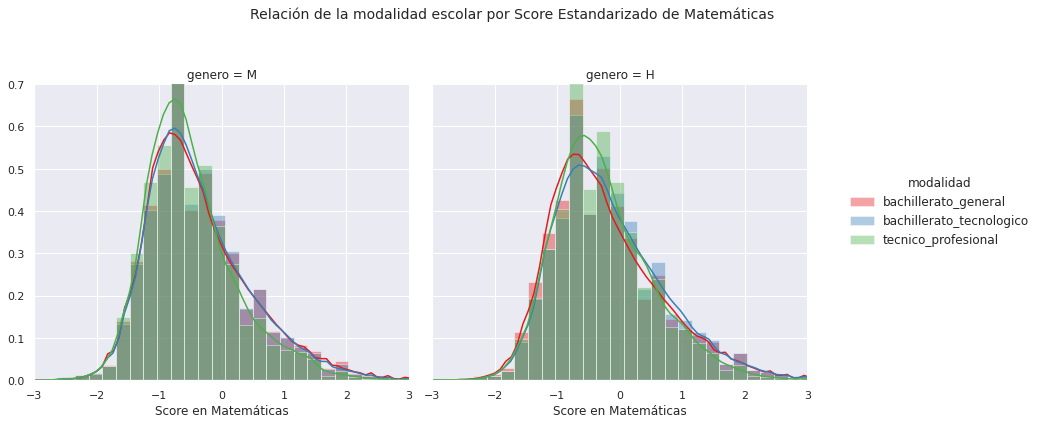

In [37]:
sns.set(style="darkgrid")
g = sns.FacetGrid(cuest,hue="modalidad", col="genero", palette="Set1",margin_titles=True, height=6, aspect=1, xlim=[-3,3], ylim=[0,0.7] )
g.map(sns.distplot,"hmat");
g.set_axis_labels("Score en Matemáticas")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Relación de la modalidad escolar por Score Estandarizado de Matemáticas',fontsize=14)
g.add_legend(fontsize=12);

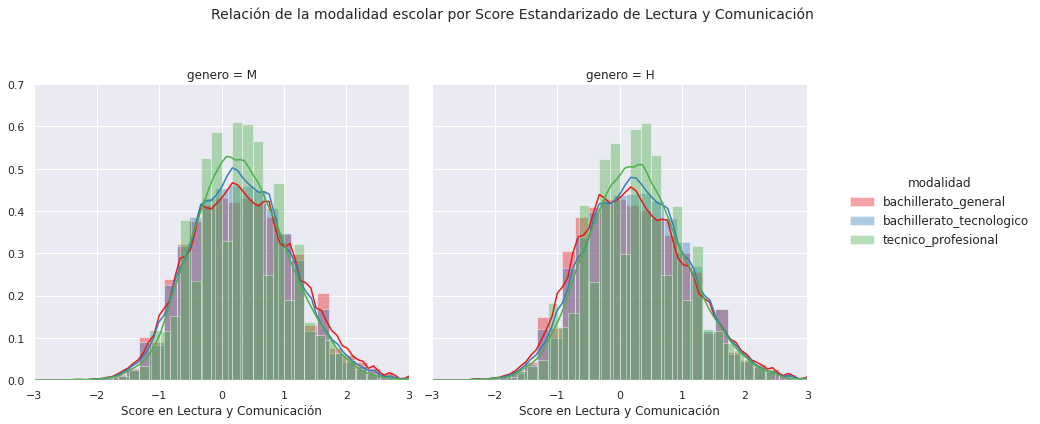

In [38]:
sns.set(style="darkgrid")
g = sns.FacetGrid(cuest,hue="modalidad", col="genero", palette="Set1",margin_titles=True, height=6, aspect=1,xlim=[-3,3],ylim=[0,0.7] )
g.map(sns.distplot,"hlec");
g.set_axis_labels("Score en Lectura y Comunicación")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Relación de la modalidad escolar por Score Estandarizado de Lectura y Comunicación',fontsize=14)
g.add_legend(fontsize=12);

Situación laboral, ¿Trabaja el alumno? pregunta 6:

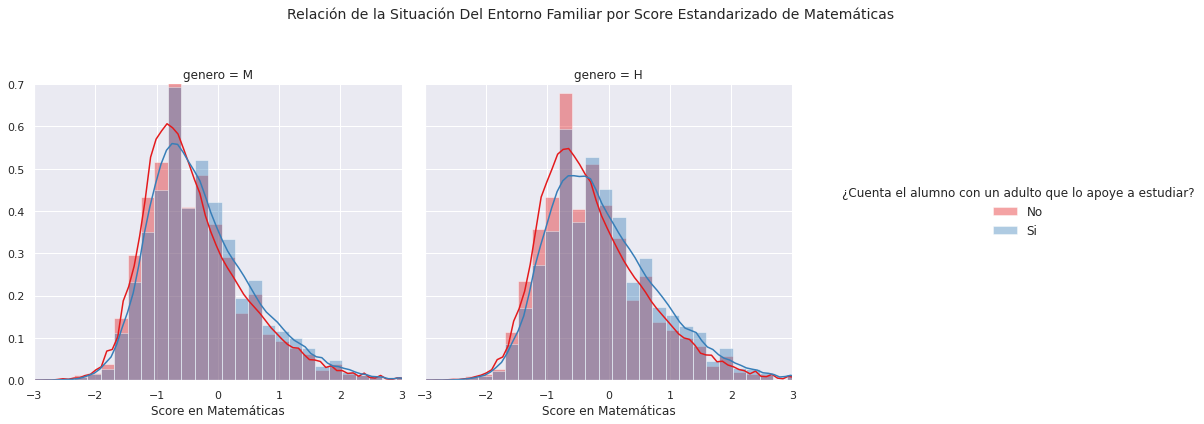

In [0]:
#Cambiamos el valor para graficar
cuest['p134'].replace([0,1],['Si','No'],inplace=True)
sns.set(style="darkgrid")
g = sns.FacetGrid(cuest,hue="p134", col="genero", palette="Set1",margin_titles=True, height=6, aspect=1, xlim=[-3,3], ylim=[0,0.7] )
g.map(sns.distplot,"hmat");
g.set_axis_labels("Score en Matemáticas")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Relación de la Situación Del Entorno Familiar por Score Estandarizado de Matemáticas',fontsize=14)
g.add_legend(title="¿Cuenta el alumno con un adulto que lo apoye a estudiar?", fontsize=12);

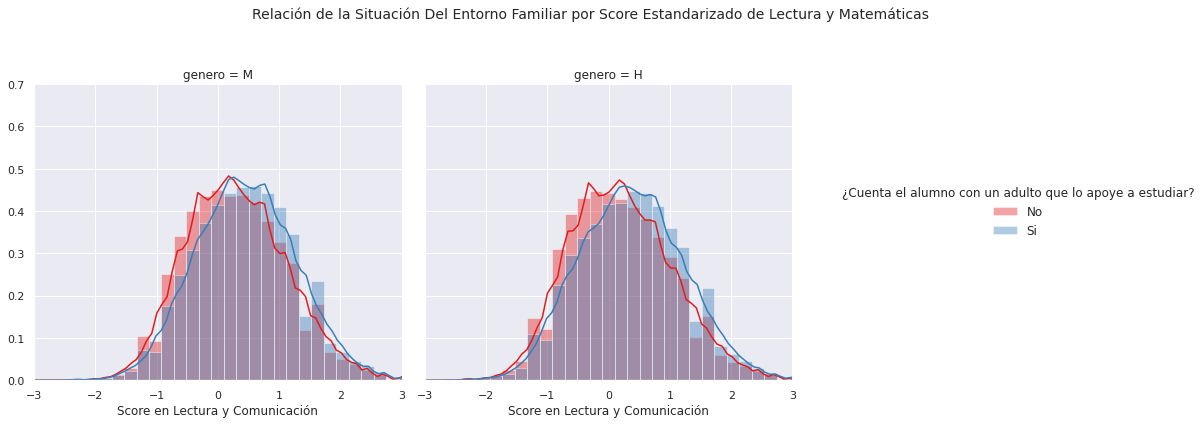

In [42]:
#Cambiamos el valor para graficar
cuest['p134'].replace([0,1],['Si','No'],inplace=True)
sns.set(style="darkgrid")
g = sns.FacetGrid(cuest,hue="p134", col="genero", palette="Set1",margin_titles=True, height=6, aspect=1, xlim=[-3,3], ylim=[0,0.7] )
g.map(sns.distplot,"hlec");
g.set_axis_labels("Score en Lectura y Comunicación")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Relación de la Situación Del Entorno Familiar por Score Estandarizado de Lectura y Matemáticas',fontsize=14)
g.add_legend(title="¿Cuenta el alumno con un adulto que lo apoye a estudiar?", fontsize=12);

Trayectoria académica, pregunta 67:

* 1)	Pública urbana
* 2)	Pública rural
* 3)	Privada
* 4)	Indígena
* 5)	Comunitaria

¿Cuentas con servicio de internet en casa?

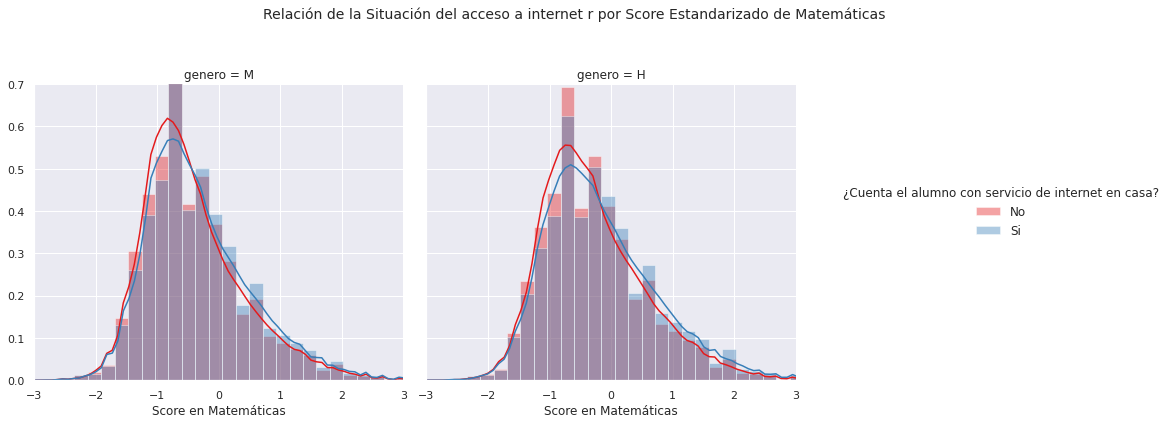

In [44]:
#Cambiamos el valor para graficar
cuest['p150'].replace([1,2],['Si','No'],inplace=True)
sns.set(style="darkgrid")
g = sns.FacetGrid(cuest,hue="p150", col="genero", palette="Set1",margin_titles=True, height=6, aspect=1, xlim=[-3,3], ylim=[0,0.7] )
g.map(sns.distplot,"hmat");
g.set_axis_labels("Score en Matemáticas")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Relación de la Situación del acceso a internet r por Score Estandarizado de Matemáticas',fontsize=14)
g.add_legend(title="¿Cuenta el alumno con servicio de internet en casa?", fontsize=12);

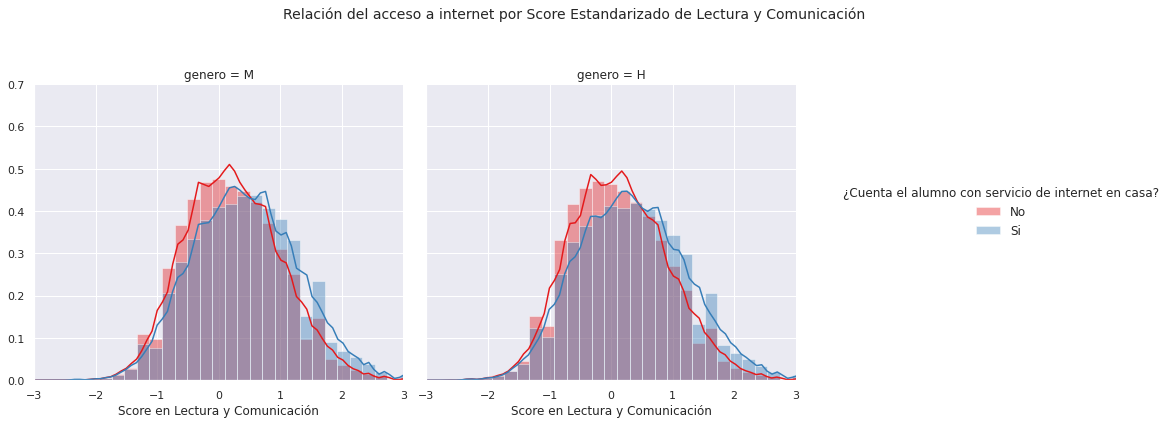

In [45]:
#Cambiamos el valor para graficar
cuest['p150'].replace([1,2],['Si','No'],inplace=True)
sns.set(style="darkgrid")
g = sns.FacetGrid(cuest,hue="p150", col="genero", palette="Set1",margin_titles=True, height=6, aspect=1, xlim=[-3,3], ylim=[0,0.7] )
g.map(sns.distplot,"hlec");
g.set_axis_labels("Score en Lectura y Comunicación")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Relación del acceso a internet por Score Estandarizado de Lectura y Comunicación',fontsize=14)
g.add_legend(title="¿Cuenta el alumno con servicio de internet en casa?", fontsize=12);

Text(0, 0.5, 'Promedio Escolar')

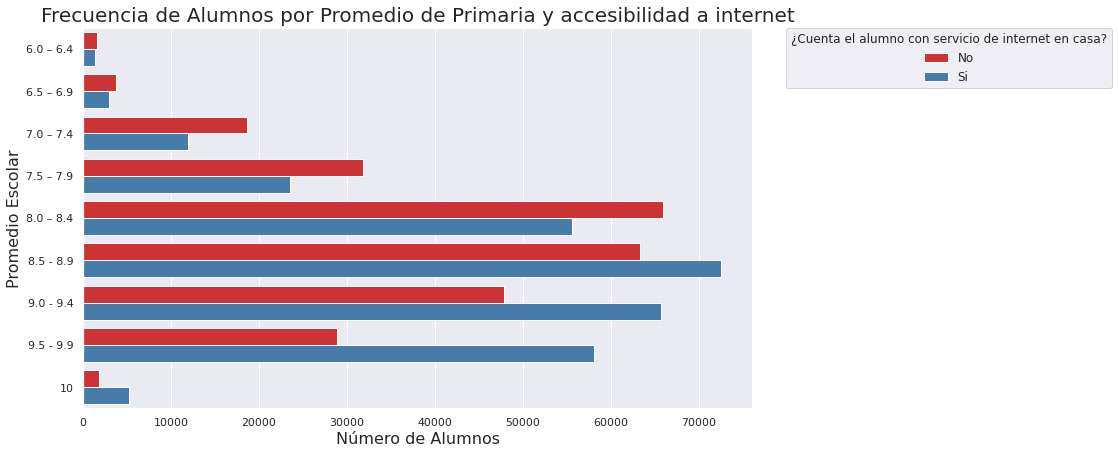

In [46]:
cuest['p68'].replace([1,2,3,4,5,6,7,8,9],["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"],inplace=True)
plt.figure(figsize=(12,7))
sns.set(style="darkgrid")
sns.countplot(y="p68", hue="p150", data=cuest, palette="Set1", order=["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"] )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='medium', fancybox=True, title="¿Cuenta el alumno con servicio de internet en casa?", )
plt.title("Frecuencia de Alumnos por Promedio de Primaria y accesibilidad a internet", fontsize=20)
plt.xlabel('Número de Alumnos', fontsize=16)
plt.ylabel('Promedio Escolar', fontsize=16)

Text(0, 0.5, 'Promedio Escolar')

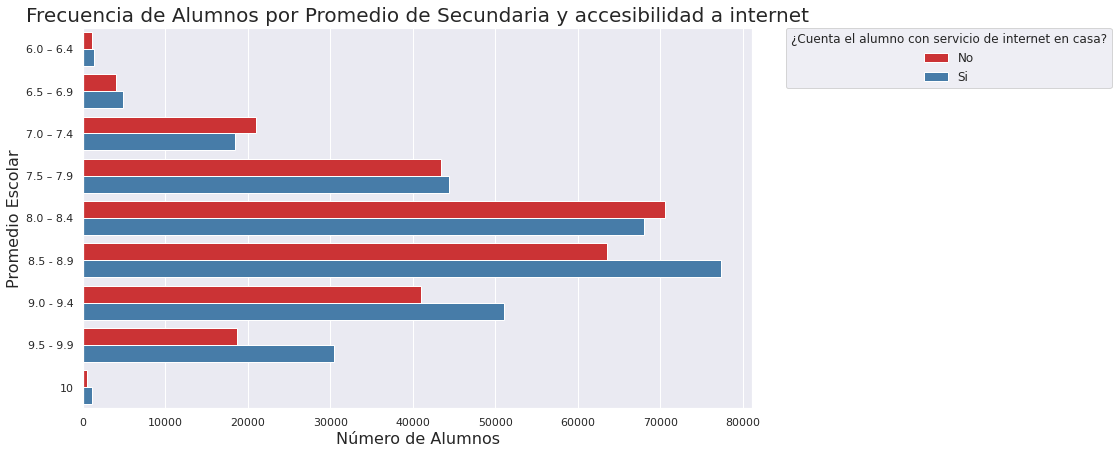

In [47]:
cuest['p71'].replace([1,2,3,4,5,6,7,8,9],["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"],inplace=True)
plt.figure(figsize=(12,7))
sns.set(style="darkgrid")
sns.countplot(y="p71", hue="p150", data=cuest, palette="Set1", order=["6.0 – 6.4",	"6.5 – 6.9",	"7.0 – 7.4",	"7.5 – 7.9",	"8.0 – 8.4"	,"8.5 - 8.9"	,"9.0 - 9.4",	"9.5 - 9.9"	, "10"] )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='medium', fancybox=True, title="¿Cuenta el alumno con servicio de internet en casa?", )
plt.title("Frecuencia de Alumnos por Promedio de Secundaria y accesibilidad a internet", fontsize=20)
plt.xlabel('Número de Alumnos', fontsize=16)
plt.ylabel('Promedio Escolar', fontsize=16)